In [1]:
from sklearn.tree import DecisionTreeClassifier  # sotring whole algo
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import matplotlib.gridspec as gridspec # subplots
from sklearn import metrics
import numpy as np   # array
import pandas as pd  # read + plot
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix #report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **DATASET**

In [10]:
# loading the data to a data frame
# read
data_frame_B= pd.read_csv("/content/drive/MyDrive/breast cancer/breast  cancer csv file all/Cancer-benign.csv")
data_frame_B1= pd.read_csv("/content/drive/MyDrive/breast cancer/breast  cancer csv file all/Cancer-benign-old.csv")

data_frame_M= pd.read_csv("/content/drive/MyDrive/breast cancer/breast  cancer csv file all/Cancer-malignant.csv")
data_frame_M1= pd.read_csv("/content/drive/MyDrive/breast cancer/breast  cancer csv file all/Cancer-malignant-old.csv")

In [8]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [12]:
data_frame_Bb = data_frame_B.drop(['class'], axis=1)  # Drop for benign
df_B_all = pd.concat([data_frame_B1, data_frame_Bb], axis=1, join='inner')

data_frame_Mm = data_frame_M.drop(['class'], axis=1)  # Drop for malignant
df_M_all = pd.concat([data_frame_M1, data_frame_Mm], axis=1, join='inner')



In [13]:
df = pd.concat([df_B_all, df_M_all])
df.shape

(569, 41)

In [14]:
df.reset_index(drop= True)
df.head()


,id,class,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Clump thickness,Cell Size,Cell Shape,Marginal Adhesion,Signle Cell size,Bare Nuclei,Bland,Nucleoli,Mitoses
0,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1,1,3,1,2,1,1,1,1
1,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,3,1,1,2,2,1,1,1,1
2,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,2,1,1,2,2,1,1,1,1
3,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1,1,1,1,10,1,1,1,1
4,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,3,1,1,1,2,1,1,1,1


In [15]:
df.to_csv("range_data.csv")

In [16]:
df.columns

Index(['id', 'class', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Clump thickness',
       'Cell Size', 'Cell Shape', 'Marginal Adhesion', 'Signle Cell size',
       'Bare Nuclei', 'Bland', 'Nucleoli', 'Mitoses'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 0 to 211
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   class                    569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             569 no

In [20]:
data = df.drop(['id'], axis=1)  # Corrected the drop method
# Checking for missing values
missing_values = data.isnull().sum()
print(missing_values)


class                      0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Clump thickness            0
Cell Size                  0
Cell Shape                 0
Marginal Adhes

In [21]:
data.corr()

ValueError: could not convert string to float: 'B'

In [22]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
data = data.apply(en.fit_transform)

In [23]:
# getting some information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 0 to 211
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   class                    569 non-null    int64
 1   radius_mean              569 non-null    int64
 2   texture_mean             569 non-null    int64
 3   perimeter_mean           569 non-null    int64
 4   area_mean                569 non-null    int64
 5   smoothness_mean          569 non-null    int64
 6   compactness_mean         569 non-null    int64
 7   concavity_mean           569 non-null    int64
 8   concave points_mean      569 non-null    int64
 9   symmetry_mean            569 non-null    int64
 10  fractal_dimension_mean   569 non-null    int64
 11  radius_se                569 non-null    int64
 12  texture_se               569 non-null    int64
 13  perimeter_se             569 non-null    int64
 14  area_se                  569 non-null    int64
 15  smoothness_

In [24]:
data.to_csv("int_range_data.csv")

In [25]:
y= data.iloc[:,0:1] # i just drop out the class
x= data.iloc[:,1: ]




In [26]:
y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [27]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Clump thickness,Cell Size,Cell Shape,Marginal Adhesion,Signle Cell size,Bare Nuclei,Bland,Nucleoli,Mitoses
0,222,61,279,283,294,228,278,316,264,122,196,120,214,239,423,169,244,330,279,147,226,79,291,294,285,190,275,297,303,154,0,0,2,0,1,0,0,0,0
1,196,108,258,244,390,388,212,245,311,394,59,98,75,78,46,243,151,83,179,167,202,113,256,243,203,343,228,142,370,300,2,0,0,1,1,0,0,0,0
2,28,16,27,28,347,138,126,135,222,412,206,203,187,91,470,163,192,362,293,247,22,11,18,21,210,91,98,103,107,234,1,0,0,1,1,0,0,0,0
3,194,216,224,246,184,17,104,225,42,141,55,497,33,69,67,8,104,283,404,68,136,178,142,168,30,3,48,63,16,24,0,0,0,0,9,0,0,0,0
4,4,146,4,4,134,108,54,19,192,338,24,195,19,4,443,201,136,58,390,190,3,156,4,3,194,117,68,16,348,173,2,0,0,0,1,0,0,0,0


# **Model Implemaentation**

In [28]:
from sklearn import svm
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn import linear_model

In [ ]:
!pip3 install catboost
from catboost  import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 13.5 MB/s eta 0:00:00


**create Stacking**

In [29]:
from sklearn.ensemble import StackingClassifier
estimator = [('LR',LogisticRegression()), ('DT', DecisionTreeClassifier()),('EX',ExtraTreesClassifier()),
             ('ADA', AdaBoostClassifier()),('LD', LinearDiscriminantAnalysis()),
             ]
Stacking = StackingClassifier( estimators=estimator, final_estimator=LogisticRegression())

***Voting ***

In [30]:
from sklearn.ensemble import  VotingClassifier
voting_classifier_hard =   VotingClassifier( estimators=estimator, voting='hard') #max two or three
voting_classifier_soft =   VotingClassifier( estimators=estimator, voting='soft') #

In [31]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.3,random_state=10)

In [42]:
import time
import pandas as pd
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score

# Initialize an empty DataFrame to store metrics
total_Metics = pd.DataFrame(columns=['Classifier', 'Accuracy', 'MCC', 'Kappa', 'Precision', 'Recall', 'F1', 'Train_Time', 'Predict_Time'])

# Define classifiers
lr = LogisticRegression(random_state=100, penalty='l1', solver='liblinear')
dt = DecisionTreeClassifier(random_state=10)
bg = BaggingClassifier(n_estimators=100, random_state=10, n_jobs=10)
gb = GradientBoostingClassifier()
hbc = HistGradientBoostingClassifier(max_depth=10, max_iter=10, n_iter_no_change=12, random_state=10, learning_rate=0.1)
nc = NearestCentroid()
per = Perceptron(tol=1e-3, random_state=10)
mlp = MLPClassifier(random_state=10, max_iter=300, solver='lbfgs', activation='relu', n_iter_no_change=2)
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
nb = GaussianNB()
svc = SVC(kernel='poly', degree=3)
knn = KNeighborsClassifier(n_neighbors=10)
ridge = RidgeClassifier()
ada = AdaBoostClassifier(n_estimators=200, random_state=10, learning_rate=1)
sgd = SGDClassifier()
ex = ExtraTreesClassifier(n_estimators=100, random_state=10)
la = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto')
lsv = LinearSVC()

# List of models
model_list = [lr,dt,ex,ada,la,voting_classifier_hard,voting_classifier_soft]

# Assuming voting_classifier_hard and voting_classifier_soft are defined
# model_list += [voting_classifier_hard, voting_classifier_soft]

for model in model_list:
    model_name = model.__class__.__name__

    # Training time
    start_train = time.time()
    model.fit(xtrain, ytrain)
    end_train = time.time()

    # Prediction time
    start_predict = time.time()
    ypred = model.predict(xtest)
    end_predict = time.time()

    # Calculating metrics
    accuracy = accuracy_score(ytest, ypred)
    mcc = matthews_corrcoef(ytest, ypred)
    kappa = cohen_kappa_score(ytest, ypred)
    f1 = f1_score(ytest, ypred, average='micro')
    precision = precision_score(ytest, ypred, average='micro')
    recall = recall_score(ytest, ypred, average='micro')

    train_time = end_train - start_train
    predict_time = end_predict - start_predict

    # Append results to the DataFrame
    total_Metics.loc[len(total_Metics)] = [model_name, accuracy, mcc, kappa, precision, recall, f1, train_time, predict_time]

# Print and save the results
print(total_Metics)
total_Metics.to_csv("all.csv", index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-42-5089252fd209>:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain, ytrain)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

                   Classifier  Accuracy       MCC     Kappa  Precision  \
0          LogisticRegression  0.988304  0.974324  0.974324   0.988304   
1      DecisionTreeClassifier  0.988304  0.974324  0.974324   0.988304   
2        ExtraTreesClassifier  0.994152  0.987195  0.987113   0.994152   
3          AdaBoostClassifier  0.994152  0.987195  0.987113   0.994152   
4  LinearDiscriminantAnalysis  0.994152  0.987195  0.987113   0.994152   
5            VotingClassifier  0.994152  0.987195  0.987113   0.994152   
6            VotingClassifier  0.994152  0.987195  0.987113   0.994152   

     Recall        F1  Train_Time  Predict_Time  
0  0.988304  0.988304    0.232839      0.002292  
1  0.988304  0.988304    0.006921      0.001513  
2  0.994152  0.994152    0.122400      0.008173  
3  0.994152  0.994152    0.682388      0.041542  
4  0.994152  0.994152    0.019615      0.002759  
5  0.994152  0.994152    0.457557      0.033180  
6  0.994152  0.994152    0.400145      0.044171  


k fold

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

In [44]:
import time
import pandas as pd
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, matthews_corrcoef, cohen_kappa_score
from sklearn.model_selection import cross_val_predict, KFold

# Initialize an empty DataFrame to store metrics
total_Metics = pd.DataFrame(columns=['Classifier', 'Accuracy', 'MCC', 'Kappa', 'Precision', 'Recall', 'F1', 'CV_Time'])


# Define cross-validation strategy
cv = KFold(n_splits=10, random_state=1, shuffle=True)

for model in model_list:
    model_name = model.__class__.__name__

    # Measure time for cross-validation predictions
    start_cv = time.time()
    y_pred = cross_val_predict(model, x, y, cv=cv, n_jobs=-1)
    end_cv = time.time()

    # Calculate metrics
    accuracy = accuracy_score(y, y_pred)
    mcc = matthews_corrcoef(y, y_pred)
    kappa = cohen_kappa_score(y, y_pred)
    f1 = f1_score(y, y_pred, average='micro')
    precision = precision_score(y, y_pred, average='micro')
    recall = recall_score(y, y_pred, average='micro')

    cv_time = end_cv - start_cv

    # Append results to the DataFrame
    total_Metics.loc[len(total_Metics)] = [model_name, accuracy, mcc, kappa, precision, recall, f1, cv_time]

# Print and save the results
print(total_Metics)
total_Metics.to_csv("all_K.csv", index=False)


                   Classifier  Accuracy       MCC     Kappa  Precision  \
0          LogisticRegression  0.985940  0.969922  0.969812   0.985940   
1      DecisionTreeClassifier  0.991213  0.981194  0.981187   0.991213   
2        ExtraTreesClassifier  0.998243  0.996244  0.996237   0.998243   
3          AdaBoostClassifier  0.994728  0.988719  0.988712   0.994728   
4  LinearDiscriminantAnalysis  0.991213  0.981289  0.981114   0.991213   
5            VotingClassifier  0.998243  0.996244  0.996237   0.998243   
6            VotingClassifier  0.998243  0.996244  0.996237   0.998243   

     Recall        F1   CV_Time  
0  0.985940  0.985940  2.604853  
1  0.991213  0.991213  0.125840  
2  0.998243  0.998243  1.186887  
3  0.994728  0.994728  6.237942  
4  0.991213  0.991213  0.131699  
5  0.998243  0.998243  4.522902  
6  0.998243  0.998243  5.023357  


In [45]:
import time
import pandas as pd
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, matthews_corrcoef, cohen_kappa_score
from sklearn.model_selection import cross_val_predict, KFold

# Initialize an empty DataFrame to store metrics
total_Metics = pd.DataFrame(columns=['Classifier', 'Accuracy', 'MCC', 'Kappa', 'Precision', 'Recall', 'F1', 'CV_Time', 'Prediction_Time'])

# Define cross-validation strategy
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# List of models to evaluate


for model in model_list:
    model_name = model.__class__.__name__

    # Measure time for cross-validation predictions
    start_cv = time.time()
    y_pred = cross_val_predict(model, x, y, cv=cv, n_jobs=-1)
    end_cv = time.time()

    # Calculate metrics
    accuracy = accuracy_score(y, y_pred)
    mcc = matthews_corrcoef(y, y_pred)
    kappa = cohen_kappa_score(y, y_pred)
    f1 = f1_score(y, y_pred, average='micro')
    precision = precision_score(y, y_pred, average='micro')
    recall = recall_score(y, y_pred, average='micro')

    cv_time = end_cv - start_cv

    # Measure prediction time separately
    start_pred = time.time()
    model.fit(x, y)
    y_pred_single = model.predict(x)
    end_pred = time.time()

    prediction_time = end_pred - start_pred

    # Append results to the DataFrame
    total_Metics.loc[len(total_Metics)] = [model_name, accuracy, mcc, kappa, precision, recall, f1, cv_time, prediction_time]

# Print and save the results
print(total_Metics)
total_Metics.to_csv("all_K.csv", index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-45-e7be156c1efc>:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/u

                   Classifier  Accuracy       MCC     Kappa  Precision  \
0          LogisticRegression  0.985940  0.969922  0.969812   0.985940   
1      DecisionTreeClassifier  0.991213  0.981194  0.981187   0.991213   
2        ExtraTreesClassifier  0.998243  0.996244  0.996237   0.998243   
3          AdaBoostClassifier  0.994728  0.988719  0.988712   0.994728   
4  LinearDiscriminantAnalysis  0.991213  0.981289  0.981114   0.991213   
5            VotingClassifier  0.998243  0.996244  0.996237   0.998243   
6            VotingClassifier  0.996485  0.992496  0.992467   0.996485   

     Recall        F1    CV_Time  Prediction_Time  
0  0.985940  0.985940   1.811673         0.277298  
1  0.991213  0.991213   0.172545         0.013598  
2  0.998243  0.998243   1.205212         0.142043  
3  0.994728  0.994728  12.662112         0.913398  
4  0.991213  0.991213   0.163747         0.016309  
5  0.998243  0.998243   3.220594         0.563087  
6  0.996485  0.996485   3.241055         0.

# **Feature selection with LASSO**

In [46]:
 from sklearn.linear_model import Lasso
 from sklearn import linear_model
 from sklearn.preprocessing import StandardScaler
 from sklearn.model_selection import GridSearchCV
 from sklearn.feature_selection import SelectFromModel


In [47]:
feature = SelectFromModel(Lasso(alpha=0.1))
lasso=feature.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.091e-02, tolerance: 9.395e-03
  model = cd_fast.enet_coordinate_descent(


In [48]:
lasso.get_feature_names_out()

array(['texture_mean', 'perimeter_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Clump thickness',
       'Cell Size', 'Cell Shape', 'Marginal Adhesion', 'Bare Nuclei',
       'Nucleoli'], dtype=object)

In [49]:
data.columns

Index(['class', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Clump thickness',
       'Cell Size', 'Cell Shape', 'Marginal Adhesion', 'Signle Cell size',
       'Bare Nuclei', 'Bland', 'Nucleoli', 'Mitoses'],
      dtype='object')

In [50]:
data_lasso = []
data_lasso = pd.DataFrame(data_lasso)
data_lasso = data.drop(['radius_mean','area_mean',
                        'radius_se','texture_se','smoothness_worst','Signle Cell size','Bland','Mitoses'
],axis=1)

In [51]:
X = data_lasso.drop(['class'], axis=1)
y = data_lasso['class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

In [ ]:
data_lasso.head()

,class,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Clump thickness,Cell Size,Cell Shape,Marginal Adhesion,Bare Nuclei,Nucleoli
0,0,61,279,294,228,278,316,264,122,214,239,423,169,244,330,279,147,226,79,291,294,190,275,297,303,154,0,0,2,0,0,0
1,0,108,258,390,388,212,245,311,394,75,78,46,243,151,83,179,167,202,113,256,243,343,228,142,370,300,2,0,0,1,0,0
2,0,16,27,347,138,126,135,222,412,187,91,470,163,192,362,293,247,22,11,18,21,91,98,103,107,234,1,0,0,1,0,0
3,0,216,224,184,17,104,225,42,141,33,69,67,8,104,283,404,68,136,178,142,168,3,48,63,16,24,0,0,0,0,0,0
4,0,146,4,134,108,54,19,192,338,19,4,443,201,136,58,390,190,3,156,4,3,117,68,16,348,173,2,0,0,0,0,0


**Train_test_lasso**

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'



for model in model_list:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y_test, y_pred)
  mcc = matthews_corrcoef(y_test, y_pred)

  kappa = cohen_kappa_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='micro')
  precision_score = precision_score(y_test, y_pred, average='micro')
  recall_score = recall_score(y_test, y_pred, average='micro')
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("lasso.csv")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

                                          Classifier  Accuracy       mcc  \
0  LogisticRegression(penalty='l1', random_state=...  0.982456  0.961712   
1            DecisionTreeClassifier(random_state=10)  0.982456  0.961990   
2  (ExtraTreeClassifier(random_state=1165313289),...  1.000000  1.000000   
3  (DecisionTreeClassifier(max_depth=1, random_st...  0.994152  0.987292   
4  LinearDiscriminantAnalysis(shrinkage='auto', s...  0.994152  0.987292   
5  VotingClassifier(estimators=[('LR', LogisticRe...  1.000000  1.000000   
6  VotingClassifier(estimators=[('LR', LogisticRe...  1.000000  1.000000   

      Kappa  precision    recall        f1  
0  0.961633   0.982456  0.982456  0.982456  
1  0.961913   0.982456  0.982456  0.982456  
2  1.000000   1.000000  1.000000  1.000000  
3  0.987211   0.994152  0.994152  0.994152  
4  0.987211   0.994152  0.994152  0.994152  
5  1.000000   1.000000  1.000000  1.000000  
6  1.000000   1.000000  1.000000  1.000000  


**K fold_lasso**

In [53]:
import time
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, matthews_corrcoef, cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# Import other models as needed

# Initialize an empty DataFrame to store metrics
total_Metics = pd.DataFrame(columns=['Classifier', 'Accuracy', 'MCC', 'Kappa', 'Precision', 'Recall', 'F1', 'Prediction_Time'])


# Define cross-validation strategy
cv = KFold(n_splits=10, random_state=1, shuffle=True)

for model in model_list:
    model_name = model.__class__.__name__

    # Measure time for cross-validation predictions
    start_cv = time.time()
    y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
    end_cv = time.time()

    # Calculate metrics
    accuracy = accuracy_score(y, y_pred)
    mcc = matthews_corrcoef(y, y_pred)
    kappa = cohen_kappa_score(y, y_pred)
    f1 = f1_score(y, y_pred, average='micro')
    precision = precision_score(y, y_pred, average='micro')
    recall = recall_score(y, y_pred, average='micro')

    cv_time = end_cv - start_cv

    # Measure prediction time separately
    start_pred = time.time()
    model.fit(X, y)
    y_pred_single = model.predict(X)
    end_pred = time.time()

    prediction_time = end_pred - start_pred

    # Append results to the DataFrame
    total_Metics.loc[len(total_Metics)] = [model_name, accuracy, mcc, kappa, precision, recall, f1, prediction_time]

# Print and save the results
print(total_Metics)
total_Metics.to_csv("lass_K.csv", index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

                   Classifier  Accuracy       MCC     Kappa  Precision  \
0          LogisticRegression  0.985940  0.969928  0.969928   0.985940   
1      DecisionTreeClassifier  0.991213  0.981194  0.981187   0.991213   
2        ExtraTreesClassifier  0.998243  0.996244  0.996237   0.998243   
3          AdaBoostClassifier  0.994728  0.988719  0.988712   0.994728   
4  LinearDiscriminantAnalysis  0.991213  0.981289  0.981114   0.991213   
5            VotingClassifier  0.998243  0.996244  0.996237   0.998243   
6            VotingClassifier  0.996485  0.992496  0.992467   0.996485   

     Recall        F1  Prediction_Time  
0  0.985940  0.985940         0.294957  
1  0.991213  0.991213         0.014899  
2  0.998243  0.998243         0.236986  
3  0.994728  0.994728         0.863409  
4  0.991213  0.991213         0.022366  
5  0.998243  0.998243         0.543724  
6  0.996485  0.996485         0.782070  


In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
cv = KFold(n_splits=10, random_state=1, shuffle=True)



for model in model_list:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score

  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)

  kappa = cohen_kappa_score(y, y_pred)
  f1 = f1_score(y, y_pred, average='micro')
  precision_score = precision_score(y, y_pred, average='micro')
  recall_score = recall_score(y, y_pred, average='micro')
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("lass_K.csv")


                                          Classifier  Accuracy       mcc  \
0  LogisticRegression(penalty='l1', random_state=...  0.985940  0.969928   
1            DecisionTreeClassifier(random_state=10)  0.991213  0.981194   
2  (ExtraTreeClassifier(random_state=1165313289),...  0.998243  0.996244   
3  (DecisionTreeClassifier(max_depth=1, random_st...  0.992970  0.984963   
4  LinearDiscriminantAnalysis(shrinkage='auto', s...  0.991213  0.981289   
5  VotingClassifier(estimators=[('LR', LogisticRe...  0.998243  0.996244   
6  VotingClassifier(estimators=[('LR', LogisticRe...  0.994728  0.988719   

      Kappa  precision    recall        f1  
0  0.969928   0.985940  0.985940  0.985940  
1  0.981187   0.991213  0.991213  0.991213  
2  0.996237   0.998243  0.998243  0.998243  
3  0.984935   0.992970  0.992970  0.992970  
4  0.981114   0.991213  0.991213  0.991213  
5  0.996237   0.998243  0.998243  0.998243  
6  0.988712   0.994728  0.994728  0.994728  


# **Feature selection with SHAP**

In [54]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 7.1 MB/s eta 0:00:00


In [ ]:
for model in model_list:
  model.fit(xtrain, ytrain)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-40-a5f0339e37c3>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain, ytrain)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

In [ ]:
import shap
explainer = shap.Explainer(lr.predict, xtest)
lr_shap_values = explainer(xtest)

Permutation explainer: 172it [00:23,  5.69it/s]                         


In [ ]:
explainer = shap.Explainer(dt.predict, xtest)
dt_shap_values = explainer(xtest)

Permutation explainer: 172it [00:10,  1.25it/s]                         


In [ ]:
explainer = shap.Explainer(ex.predict, xtest)
hbc_shap_values = explainer(xtest)

Permutation explainer: 172it [01:11,  2.06it/s]


In [ ]:
explainer = shap.Explainer(ada.predict, xtest)
ada_shap_values = explainer(xtest)

Permutation explainer: 172it [06:32,  2.35s/it]


In [ ]:
explainer = shap.Explainer(la.predict, xtest)
la_shap_values = explainer(xtest)

In [ ]:
explainer = shap.Explainer(voting_classifier_soft.predict, xtest)
voting_classifier_soft_shap_values = explainer(xtest)

Permutation explainer: 172it [03:40,  1.35s/it]


In [ ]:
explainer = shap.Explainer(voting_classifier_hard.predict, xtest)
voting_classifier_hard_shap_values = explainer(xtest)

In [ ]:
plt.figure(figsize=(5,5))


plt.subplot(2,2,1)
shap.summary_plot(lr_shap_values,show ="false")

plt.subplot(2,2,2)
shap.summary_plot(dt_shap_values,show ="false")




plt.tight_layout()
plt.show()
plt.savefig('all sp1.png', dpi=800)

In [ ]:
plt.figure(figsize=(5,5))


plt.subplot(2,2,1)
shap.summary_plot(hbc_shap_values,show ="false")



plt.subplot(2,2,3)
shap.summary_plot(ada_shap_values,show ="false")


plt.tight_layout()
plt.show()
plt.savefig('all sp2.png', dpi=800)

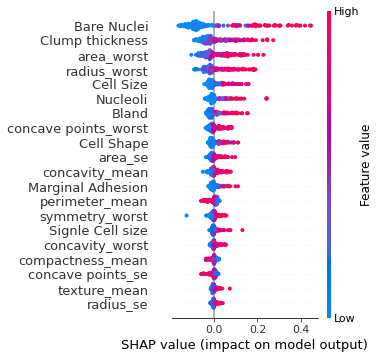

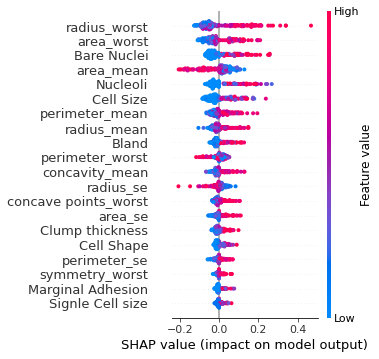

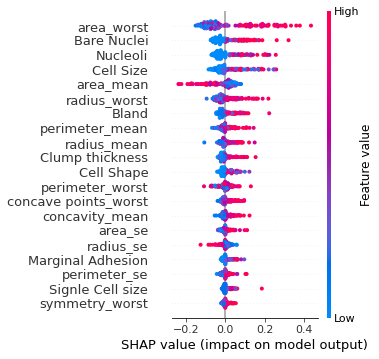

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(5,5))


plt.subplot(2,2,2)
shap.summary_plot(la_shap_values,show ="false")

plt.subplot(2,2,3)
shap.summary_plot(voting_classifier_soft_shap_values,show ="false")
plt.subplot(2,2,4)
shap.summary_plot(voting_classifier_hard_shap_values,show ="false")


plt.tight_layout()
plt.show()
plt.savefig('all sp3.png', dpi=800)
plt.savefig('all sp3.pdf', dpi=800)

In [ ]:
data.columns

In [55]:
data_shap = [] #most common features in all algorithms were selected
data_shap = pd.DataFrame(data_shap)
data_shap = data.drop([ 'symmetry_mean','fractal_dimension_mean','compactness_mean',
        'texture_se', 'smoothness_se','Cell Shape',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se','compactness_worst', 'concavity_worst',
       'fractal_dimension_se','texture_worst', 'smoothness_worst', 'fractal_dimension_worst', 'Mitoses', 'concave points_worst','symmetry_worst'

],axis=1)

In [ ]:
data_shap.head()

,class,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,Clump thickness,Cell Size,Marginal Adhesion,Signle Cell size,Bare Nuclei,Bland,Nucleoli
0,0,222,61,279,283,294,278,316,196,214,239,226,291,294,0,0,0,1,0,0,0
1,0,196,108,258,244,390,212,245,59,75,78,202,256,243,2,0,1,1,0,0,0
2,0,28,16,27,28,347,126,135,206,187,91,22,18,21,1,0,1,1,0,0,0
3,0,194,216,224,246,184,104,225,55,33,69,136,142,168,0,0,0,9,0,0,0
4,0,4,146,4,4,134,54,19,24,19,4,3,4,3,2,0,0,1,0,0,0


In [56]:
Xs = data_shap.drop(['class'], axis=1)
ys = data_shap['class']
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs,ys,test_size=0.3, random_state=123)

**train test Shap**

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'



for model in model_list:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score

  model.fit(Xs_train, ys_train)
  ys_pred = model.predict(Xs_test)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ys_test, ys_pred)
  mcc = matthews_corrcoef(ys_test, ys_pred)

  kappa = cohen_kappa_score(ys_test, ys_pred)
  f1 = f1_score(ys_test, ys_pred, average='micro')
  precision_score = precision_score(ys_test, ys_pred, average='micro')
  recall_score = recall_score(ys_test, ys_pred, average='micro')
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("shap.csv")

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


                                          Classifier  Accuracy       mcc  \
0  LogisticRegression(penalty='l1', random_state=...  0.976608  0.949705   
1            DecisionTreeClassifier(random_state=10)  0.994152  0.987292   
2  (ExtraTreeClassifier(random_state=1165313289),...  1.000000  1.000000   
3  (DecisionTreeClassifier(max_depth=1, random_st...  0.988304  0.974649   
4  LinearDiscriminantAnalysis(shrinkage='auto', s...  0.994152  0.987292   
5  VotingClassifier(estimators=[('LR', LogisticRe...  1.000000  1.000000   
6  VotingClassifier(estimators=[('LR', LogisticRe...  1.000000  1.000000   

      Kappa  precision    recall        f1  
0  0.949401   0.976608  0.976608  0.976608  
1  0.987211   0.994152  0.994152  0.994152  
2  1.000000   1.000000  1.000000  1.000000  
3  0.974328   0.988304  0.988304  0.988304  
4  0.987211   0.994152  0.994152  0.994152  
5  1.000000   1.000000  1.000000  1.000000  
6  1.000000   1.000000  1.000000  1.000000  


**k fold shap**

In [62]:


# Initialize an empty DataFrame to store metrics
total_Metrics = pd.DataFrame(columns=['Classifier', 'Accuracy', 'MCC', 'Kappa', 'Precision', 'Recall', 'F1', 'Prediction_Time'])


# Define cross-validation strategy
cv = KFold(n_splits=10, random_state=1, shuffle=True)

for model in model_list:
    model_name = model.__class__.__name__

    # Measure time for cross-validation predictions
    start_cv = time.time()
    ys_pred = cross_val_predict(model, Xs, ys, cv=cv, n_jobs=-1)
    end_cv = time.time()

    # Calculate metrics
    accuracy = accuracy_score(ys, ys_pred)
    mcc = matthews_corrcoef(ys, ys_pred)
    kappa = cohen_kappa_score(ys, ys_pred)
    f1 = f1_score(ys, ys_pred, average='micro')
    precision = precision_score(ys, ys_pred, average='micro')
    recall = recall_score(ys, ys_pred, average='micro')

    cv_time = end_cv - start_cv

    # Measure prediction time separately
    start_pred = time.time()
    model.fit(Xs, ys)
    ys_pred_single = model.predict(Xs)
    end_pred = time.time()

    prediction_time = end_pred - start_pred

    # Append results to the DataFrame
    total_Metrics.loc[len(total_Metrics)] = [model_name, accuracy, mcc, kappa, precision, recall, f1, prediction_time]

# Print and save the results
print(total_Metrics)
total_Metrics.to_csv("shap_K.csv", index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

                   Classifier  Accuracy       MCC     Kappa  Precision  \
0          LogisticRegression  0.998243  0.996244  0.996237   0.998243   
1      DecisionTreeClassifier  0.991213  0.981213  0.981151   0.991213   
2        ExtraTreesClassifier  0.998243  0.996244  0.996237   0.998243   
3          AdaBoostClassifier  0.996485  0.992482  0.992482   0.996485   
4  LinearDiscriminantAnalysis  0.992970  0.985018  0.984906   0.992970   
5            VotingClassifier  0.998243  0.996244  0.996237   0.998243   
6            VotingClassifier  0.998243  0.996244  0.996237   0.998243   

     Recall        F1  Prediction_Time  
0  0.998243  0.998243         0.474355  
1  0.991213  0.991213         0.017575  
2  0.998243  0.998243         0.229250  
3  0.996485  0.996485         0.747635  
4  0.992970  0.992970         0.032799  
5  0.998243  0.998243         0.717943  
6  0.998243  0.998243         0.449979  


In [60]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
cv = KFold(n_splits=10, random_state=1, shuffle=True)



for model in model_list:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score

  ys_pred = cross_val_predict(model, Xs, ys, cv=cv, n_jobs=-1)

  # cm1 = confusion_matrix(y, ys_pred)
  # report performance
  Accuracy = accuracy_score(ys, ys_pred)
  mcc = matthews_corrcoef(ys, ys_pred)

  kappa = cohen_kappa_score(ys, ys_pred)
  f1 = f1_score(ys, ys_pred, average='micro')
  precision_score = precision_score(ys, ys_pred, average='micro')
  recall_score = recall_score(ys, ys_pred, average='micro')
  # ys_pred = np.argmax(ys_pred, axis=0)
  # auc = roc_auc_score(y, ys_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("shap_K.csv")

                                          Classifier  Accuracy       mcc  \
0  LogisticRegression(penalty='l1', random_state=...  0.998243  0.996244   
1            DecisionTreeClassifier(random_state=10)  0.991213  0.981213   
2  (ExtraTreeClassifier(random_state=1165313289),...  0.998243  0.996244   
3  (DecisionTreeClassifier(max_depth=1, random_st...  0.996485  0.992482   
4  LinearDiscriminantAnalysis(shrinkage='auto', s...  0.992970  0.985018   
5  VotingClassifier(estimators=[('LR', LogisticRe...  0.998243  0.996244   
6  VotingClassifier(estimators=[('LR', LogisticRe...  0.998243  0.996244   

      Kappa  precision    recall        f1  
0  0.996237   0.998243  0.998243  0.998243  
1  0.981151   0.991213  0.991213  0.991213  
2  0.996237   0.998243  0.998243  0.998243  
3  0.992482   0.996485  0.996485  0.996485  
4  0.984906   0.992970  0.992970  0.992970  
5  0.996237   0.998243  0.998243  0.998243  
6  0.996237   0.998243  0.998243  0.998243  


# **Visualise**

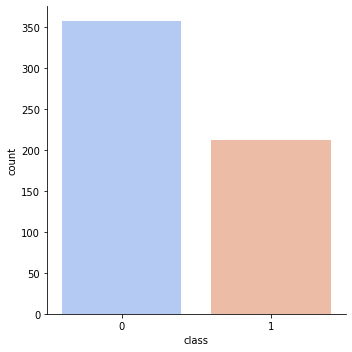

In [ ]:
sns.catplot(data=data, x='class', kind='count',palette="coolwarm"); #data count m and b
plt.savefig('Datset Performance.png', dpi=800)
plt.savefig('Datset Performance.pdf', dpi=800)

In [ ]:
plt.figure(figsize = (18,13))
mask = np.triu(np.ones_like(data, dtype=np.bool))
sns.heatmap(data.corr(),annot = True,fmt=".1f", cmap='coolwarm',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
plt.savefig('all heatmap.png', dpi=800)
plt.savefig('all heatmap.pdf', dpi=800)

# **All visualize**

In [ ]:
sns.catplot(data=data, x='class', kind='count',palette="coolwarm");


In [ ]:
plt.figure(figsize = (18,13))
mask = np.triu(np.ones_like(data_lasso, dtype=np.bool))
sns.heatmap(data_lasso.corr(),annot = True,fmt=".3f", cmap='coolwarm',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
plt.savefig('all heatmap.png', dpi=800)
plt.savefig('all heatmap.pdf', dpi=800)

In [ ]:
plt.figure(figsize = (18,13))
mask = np.triu(np.ones_like(data_shap, dtype=np.bool))
sns.heatmap(data_shap.corr(),annot = True,fmt=".3f", cmap='coolwarm',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
plt.savefig('all heatmap.png', dpi=800)
plt.savefig('all heatmap.pdf', dpi=800)

# **EDA**

In [ ]:
! pip install sweetviz

In [ ]:
import sweetviz as sv
analyze_report = sv.analyze(data)
analyze_report.show_html('analyze.html', open_browser=False)

In [ ]:
import IPython
IPython.display.HTML('analyze.html')

Output hidden; open in https://colab.research.google.com to view.

# separate dataset: testing two dataset

cancer old set + new one by one

# **DATASET**

In [189]:
# loading the data to a data frame
# read
df= pd.read_csv("/content/drive/MyDrive/breast cancer/breast  cancer csv file all/Cancer-newdata-all.csv")




In [67]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [190]:

df.shape

(569, 10)

In [191]:
df.reset_index(drop= True)
df.head()


,Clump thickness,Cell Size,Cell Shape,Marginal Adhesion,Signle Cell size,Bare Nuclei,Bland,Nucleoli,Mitoses,class
0,1,1,3,1,2,1,1,1,1,B
1,3,1,1,2,2,1,1,1,1,B
2,2,1,1,2,2,1,1,1,1,B
3,1,1,1,1,10,1,1,1,1,B
4,3,1,1,1,2,1,1,1,1,B


In [116]:
df.to_csv("range_data.csv")

In [117]:
df.columns

Index(['class', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Clump thickness    569 non-null    int64 
 1   Cell Size          569 non-null    int64 
 2   Cell Shape         569 non-null    int64 
 3   Marginal Adhesion  569 non-null    int64 
 4   Signle Cell size   569 non-null    int64 
 5   Bare Nuclei        569 non-null    int64 
 6   Bland              569 non-null    int64 
 7   Nucleoli           569 non-null    int64 
 8   Mitoses            569 non-null    int64 
 9   class              569 non-null    object
dtypes: int64(9), object(1)
memory usage: 44.6+ KB


In [154]:

missing_values = df.isnull().sum()
print(missing_values)


class                      0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [136]:
data.corr()

ValueError: could not convert string to float: 'B'

In [192]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
data = df.apply(en.fit_transform)

In [193]:
# getting some information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Clump thickness    569 non-null    int64
 1   Cell Size          569 non-null    int64
 2   Cell Shape         569 non-null    int64
 3   Marginal Adhesion  569 non-null    int64
 4   Signle Cell size   569 non-null    int64
 5   Bare Nuclei        569 non-null    int64
 6   Bland              569 non-null    int64
 7   Nucleoli           569 non-null    int64
 8   Mitoses            569 non-null    int64
 9   class              569 non-null    int64
dtypes: int64(10)
memory usage: 44.6 KB


In [95]:
data.to_csv("int_range_data.csv")

In [217]:

x = data.drop(columns=['class'])  # Features
y = data['class']


In [218]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [219]:
x.head()

,Clump thickness,Cell Size,Cell Shape,Marginal Adhesion,Signle Cell size,Bare Nuclei,Bland,Nucleoli,Mitoses
0,0,0,2,0,1,0,0,0,0
1,2,0,0,1,1,0,0,0,0
2,1,0,0,1,1,0,0,0,0
3,0,0,0,0,9,0,0,0,0
4,2,0,0,0,1,0,0,0,0


model

In [100]:
import time
import pandas as pd
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, matthews_corrcoef, cohen_kappa_score
from sklearn.model_selection import cross_val_predict, KFold

# Initialize an empty DataFrame to store metrics
total_Metics = pd.DataFrame(columns=['Classifier', 'Accuracy', 'MCC', 'Kappa', 'Precision', 'Recall', 'F1', 'CV_Time', 'Prediction_Time'])

# Define cross-validation strategy
cv = KFold(n_splits=10, random_state=100, shuffle=True)

# List of models to evaluate


for model in model_list:
    model_name = model.__class__.__name__

    # Measure time for cross-validation predictions
    start_cv = time.time()
    y_pred = cross_val_predict(model, x, y, cv=cv, n_jobs=-1)
    end_cv = time.time()

    # Calculate metrics
    accuracy = accuracy_score(y, y_pred)
    mcc = matthews_corrcoef(y, y_pred)
    kappa = cohen_kappa_score(y, y_pred)
    f1 = f1_score(y, y_pred, average='micro')
    precision = precision_score(y, y_pred, average='micro')
    recall = recall_score(y, y_pred, average='micro')

    cv_time = end_cv - start_cv

    # Measure prediction time separately
    start_pred = time.time()
    model.fit(x, y)
    y_pred_single = model.predict(x)
    end_pred = time.time()

    prediction_time = end_pred - start_pred

    # Append results to the DataFrame
    total_Metics.loc[len(total_Metics)] = [model_name, accuracy, mcc, kappa, precision, recall, f1, cv_time, prediction_time]

# Print and save the results
print(total_Metics)
total_Metics.to_csv("all_K.csv", index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-100-db1049b876d1>:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/

                   Classifier  Accuracy       MCC     Kappa  Precision  \
0          LogisticRegression  0.987698  0.973734  0.973560   0.987698   
1      DecisionTreeClassifier  0.991213  0.981213  0.981151   0.991213   
2        ExtraTreesClassifier  0.996485  0.992496  0.992467   0.996485   
3          AdaBoostClassifier  0.996485  0.992496  0.992467   0.996485   
4  LinearDiscriminantAnalysis  0.991213  0.981289  0.981114   0.991213   
5            VotingClassifier  0.998243  0.996244  0.996237   0.998243   
6            VotingClassifier  0.998243  0.996244  0.996237   0.998243   

     Recall        F1    CV_Time  Prediction_Time  
0  0.987698  0.987698   2.706925         0.407460  
1  0.991213  0.991213   0.216630         0.018122  
2  0.996485  0.996485   2.917210         0.589891  
3  0.996485  0.996485  11.933516         0.964044  
4  0.991213  0.991213   0.148657         0.015870  
5  0.998243  0.998243   3.341458         0.566776  
6  0.998243  0.998243   4.407007         0.

# **Feature selection with LASSO**

In [142]:
 from sklearn.linear_model import Lasso
 from sklearn import linear_model
 from sklearn.preprocessing import StandardScaler
 from sklearn.model_selection import GridSearchCV
 from sklearn.feature_selection import SelectFromModel


In [163]:
feature = SelectFromModel(Lasso(alpha=0.1))
lasso=feature.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.556e-02, tolerance: 1.330e-02
  model = cd_fast.enet_coordinate_descent(


In [164]:
lasso.get_feature_names_out()

array(['texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object)

In [165]:
data.columns

Index(['class', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [167]:
data_lasso = []
data_lasso = pd.DataFrame(data_lasso)
data_lasso = data.drop(['radius_mean','perimeter_mean', 'area_mean',
                        'symmetry_mean','concave points_se','compactness_worst',
],axis=1)

In [168]:
X = data_lasso.drop(['class'], axis=1)
y = data_lasso['class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

In [169]:
data_lasso.head()

,class,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,61,294,228,278,316,122,196,120,214,239,423,169,244,279,147,226,79,291,294,285,275,297,303,154
1,0,108,390,388,212,245,394,59,98,75,78,46,243,151,179,167,202,113,256,243,203,228,142,370,300
2,0,16,347,138,126,135,412,206,203,187,91,470,163,192,293,247,22,11,18,21,210,98,103,107,234
3,0,216,184,17,104,225,141,55,497,33,69,67,8,104,404,68,136,178,142,168,30,48,63,16,24
4,0,146,134,108,54,19,338,24,195,19,4,443,201,136,390,190,3,156,4,3,194,68,16,348,173


**Train_test_lasso**

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'



for model in model_list:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y_test, y_pred)
  mcc = matthews_corrcoef(y_test, y_pred)

  kappa = cohen_kappa_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='micro')
  precision_score = precision_score(y_test, y_pred, average='micro')
  recall_score = recall_score(y_test, y_pred, average='micro')
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("lasso.csv")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

                                          Classifier  Accuracy       mcc  \
0  LogisticRegression(penalty='l1', random_state=...  0.982456  0.961712   
1            DecisionTreeClassifier(random_state=10)  0.982456  0.961990   
2  (ExtraTreeClassifier(random_state=1165313289),...  1.000000  1.000000   
3  (DecisionTreeClassifier(max_depth=1, random_st...  0.994152  0.987292   
4  LinearDiscriminantAnalysis(shrinkage='auto', s...  0.994152  0.987292   
5  VotingClassifier(estimators=[('LR', LogisticRe...  1.000000  1.000000   
6  VotingClassifier(estimators=[('LR', LogisticRe...  1.000000  1.000000   

      Kappa  precision    recall        f1  
0  0.961633   0.982456  0.982456  0.982456  
1  0.961913   0.982456  0.982456  0.982456  
2  1.000000   1.000000  1.000000  1.000000  
3  0.987211   0.994152  0.994152  0.994152  
4  0.987211   0.994152  0.994152  0.994152  
5  1.000000   1.000000  1.000000  1.000000  
6  1.000000   1.000000  1.000000  1.000000  


**K fold_lasso**

In [170]:
import time
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, matthews_corrcoef, cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# Import other models as needed

# Initialize an empty DataFrame to store metrics
total_Metics = pd.DataFrame(columns=['Classifier', 'Accuracy', 'MCC', 'Kappa', 'Precision', 'Recall', 'F1', 'Prediction_Time'])


# Define cross-validation strategy
cv = KFold(n_splits=10, random_state=1, shuffle=True)

for model in model_list:
    model_name = model.__class__.__name__

    # Measure time for cross-validation predictions
    start_cv = time.time()
    y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
    end_cv = time.time()

    # Calculate metrics
    accuracy = accuracy_score(y, y_pred)
    mcc = matthews_corrcoef(y, y_pred)
    kappa = cohen_kappa_score(y, y_pred)
    f1 = f1_score(y, y_pred, average='micro')
    precision = precision_score(y, y_pred, average='micro')
    recall = recall_score(y, y_pred, average='micro')

    cv_time = end_cv - start_cv

    # Measure prediction time separately
    start_pred = time.time()
    model.fit(X, y)
    y_pred_single = model.predict(X)
    end_pred = time.time()

    prediction_time = end_pred - start_pred

    # Append results to the DataFrame
    total_Metics.loc[len(total_Metics)] = [model_name, accuracy, mcc, kappa, precision, recall, f1, prediction_time]

# Print and save the results
print(total_Metics)
total_Metics.to_csv("lass_K.csv", index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

                   Classifier  Accuracy       MCC     Kappa  Precision  \
0          LogisticRegression  0.957821  0.909783  0.909783   0.957821   
1      DecisionTreeClassifier  0.924429  0.840750  0.840046   0.924429   
2        ExtraTreesClassifier  0.970123  0.935993  0.935665   0.970123   
3          AdaBoostClassifier  0.959578  0.913289  0.913126   0.959578   
4  LinearDiscriminantAnalysis  0.971880  0.939951  0.939273   0.971880   
5            VotingClassifier  0.970123  0.935956  0.935789   0.970123   
6            VotingClassifier  0.966608  0.928400  0.928234   0.966608   

     Recall        F1  Prediction_Time  
0  0.957821  0.957821         0.322169  
1  0.924429  0.924429         0.013984  
2  0.970123  0.970123         0.151236  
3  0.959578  0.959578         0.860545  
4  0.971880  0.971880         0.025575  
5  0.970123  0.970123         0.550918  
6  0.966608  0.966608         0.497146  


# **Feature selection with SHAP**

In [171]:
pip install shap

In [220]:
for model in model_list:
  model.fit(x, y)

In [221]:
import shap
explainer = shap.Explainer(lr.predict, x)
lr_shap_values = explainer(x)

In [222]:
explainer = shap.Explainer(dt.predict, x)
dt_shap_values = explainer(x)

In [223]:
explainer = shap.Explainer(ex.predict, x)
hbc_shap_values = explainer(x)

ExactExplainer explainer: 570it [01:35,  5.06it/s]


In [224]:
explainer = shap.Explainer(ada.predict, x)
ada_shap_values = explainer(x)

ExactExplainer explainer: 570it [06:18,  1.45it/s]


In [225]:
explainer = shap.Explainer(la.predict, x)
la_shap_values = explainer(x)

In [226]:
explainer = shap.Explainer(voting_classifier_soft.predict, x)
voting_classifier_soft_shap_values = explainer(x)

ExactExplainer explainer: 570it [03:53,  2.31it/s]


In [227]:
explainer = shap.Explainer(voting_classifier_hard.predict, x)
voting_classifier_hard_shap_values = explainer(x)

ExactExplainer explainer: 570it [05:22,  1.70it/s]


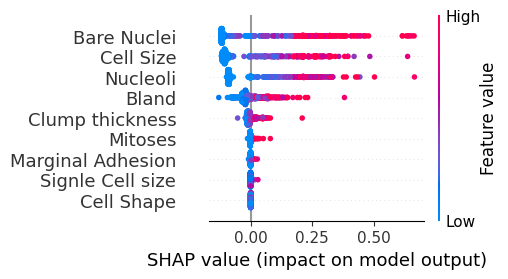

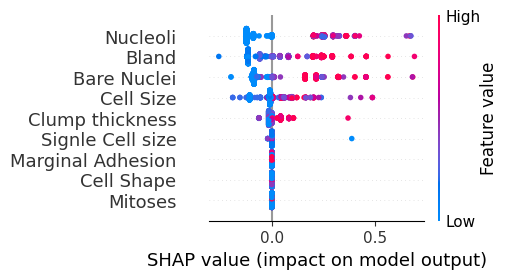

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [228]:
plt.figure(figsize=(5,5))


plt.subplot(2,2,1)
shap.summary_plot(lr_shap_values,show ="false")

plt.subplot(2,2,2)
shap.summary_plot(dt_shap_values,show ="false")




plt.tight_layout()
plt.show()
plt.savefig('all sp1.png', dpi=800)

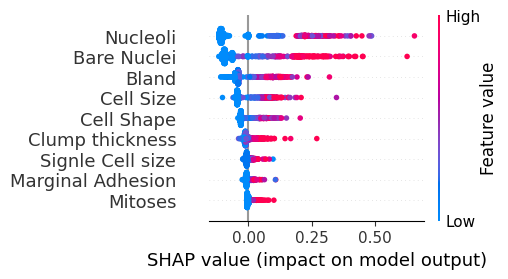

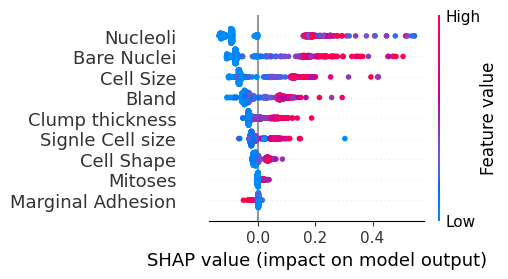

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [229]:
plt.figure(figsize=(5,5))


plt.subplot(2,2,1)
shap.summary_plot(hbc_shap_values,show ="false")



plt.subplot(2,2,3)
shap.summary_plot(ada_shap_values,show ="false")


plt.tight_layout()
plt.show()
plt.savefig('all sp2.png', dpi=800)

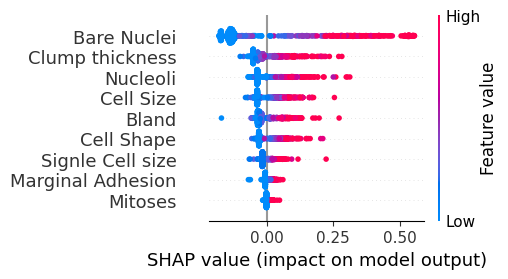

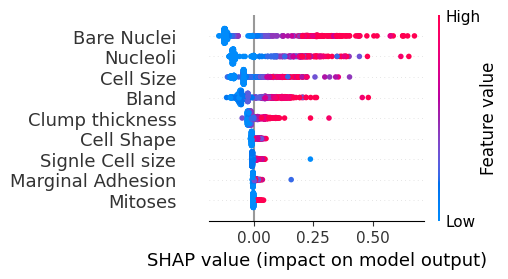

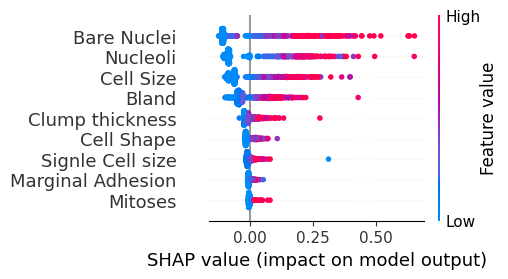

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [230]:
plt.figure(figsize=(5,5))


plt.subplot(2,2,2)
shap.summary_plot(la_shap_values,show ="false")

plt.subplot(2,2,3)
shap.summary_plot(voting_classifier_soft_shap_values,show ="false")
plt.subplot(2,2,4)
shap.summary_plot(voting_classifier_hard_shap_values,show ="false")


plt.tight_layout()
plt.show()
plt.savefig('all sp3.png', dpi=800)
plt.savefig('all sp3.pdf', dpi=800)

In [232]:
data.columns

Index(['Clump thickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Signle Cell size', 'Bare Nuclei', 'Bland', 'Nucleoli', 'Mitoses',
       'class'],
      dtype='object')

In [236]:
data_shap = [] #most common features in all algorithms were selected
data_shap = pd.DataFrame(data_shap)
data_shap = data.drop([ 'Signle Cell size','Mitoses','Marginal Adhesion'

],axis=1)

In [237]:
data_shap.head()

,Clump thickness,Cell Size,Cell Shape,Bare Nuclei,Bland,Nucleoli,class
0,0,0,2,0,0,0,0
1,2,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0


In [238]:
Xs = data_shap.drop(['class'], axis=1)
ys = data_shap['class']
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs,ys,test_size=0.3, random_state=123)

**train test Shap**

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'



for model in model_list:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score

  model.fit(Xs_train, ys_train)
  ys_pred = model.predict(Xs_test)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ys_test, ys_pred)
  mcc = matthews_corrcoef(ys_test, ys_pred)

  kappa = cohen_kappa_score(ys_test, ys_pred)
  f1 = f1_score(ys_test, ys_pred, average='micro')
  precision_score = precision_score(ys_test, ys_pred, average='micro')
  recall_score = recall_score(ys_test, ys_pred, average='micro')
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("shap.csv")

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


                                          Classifier  Accuracy       mcc  \
0  LogisticRegression(penalty='l1', random_state=...  0.976608  0.949705   
1            DecisionTreeClassifier(random_state=10)  0.994152  0.987292   
2  (ExtraTreeClassifier(random_state=1165313289),...  1.000000  1.000000   
3  (DecisionTreeClassifier(max_depth=1, random_st...  0.988304  0.974649   
4  LinearDiscriminantAnalysis(shrinkage='auto', s...  0.994152  0.987292   
5  VotingClassifier(estimators=[('LR', LogisticRe...  1.000000  1.000000   
6  VotingClassifier(estimators=[('LR', LogisticRe...  1.000000  1.000000   

      Kappa  precision    recall        f1  
0  0.949401   0.976608  0.976608  0.976608  
1  0.987211   0.994152  0.994152  0.994152  
2  1.000000   1.000000  1.000000  1.000000  
3  0.974328   0.988304  0.988304  0.988304  
4  0.987211   0.994152  0.994152  0.994152  
5  1.000000   1.000000  1.000000  1.000000  
6  1.000000   1.000000  1.000000  1.000000  


**k fold shap**

In [239]:


# Initialize an empty DataFrame to store metrics
total_Metrics = pd.DataFrame(columns=['Classifier', 'Accuracy', 'MCC', 'Kappa', 'Precision', 'Recall', 'F1', 'Prediction_Time'])


# Define cross-validation strategy
cv = KFold(n_splits=10, random_state=1, shuffle=True)

for model in model_list:
    model_name = model.__class__.__name__

    # Measure time for cross-validation predictions
    start_cv = time.time()
    ys_pred = cross_val_predict(model, Xs, ys, cv=cv, n_jobs=-1)
    end_cv = time.time()

    # Calculate metrics
    accuracy = accuracy_score(ys, ys_pred)
    mcc = matthews_corrcoef(ys, ys_pred)
    kappa = cohen_kappa_score(ys, ys_pred)
    f1 = f1_score(ys, ys_pred, average='micro')
    precision = precision_score(ys, ys_pred, average='micro')
    recall = recall_score(ys, ys_pred, average='micro')

    cv_time = end_cv - start_cv

    # Measure prediction time separately
    start_pred = time.time()
    model.fit(Xs, ys)
    ys_pred_single = model.predict(Xs)
    end_pred = time.time()

    prediction_time = end_pred - start_pred

    # Append results to the DataFrame
    total_Metrics.loc[len(total_Metrics)] = [model_name, accuracy, mcc, kappa, precision, recall, f1, prediction_time]

# Print and save the results
print(total_Metrics)
total_Metrics.to_csv("shap_K.csv", index=False)


                   Classifier  Accuracy       MCC     Kappa  Precision  \
0          LogisticRegression  0.994728  0.988719  0.988712   0.994728   
1      DecisionTreeClassifier  0.980668  0.958593  0.958531   0.980668   
2        ExtraTreesClassifier  0.994728  0.988719  0.988712   0.994728   
3          AdaBoostClassifier  0.989455  0.977430  0.977402   0.989455   
4  LinearDiscriminantAnalysis  0.971880  0.940675  0.938919   0.971880   
5            VotingClassifier  0.992970  0.984964  0.984964   0.992970   
6            VotingClassifier  0.989455  0.977430  0.977402   0.989455   

     Recall        F1  Prediction_Time  
0  0.994728  0.994728         0.010356  
1  0.980668  0.980668         0.006210  
2  0.994728  0.994728         0.228246  
3  0.989455  0.989455         0.440057  
4  0.971880  0.971880         0.009058  
5  0.992970  0.992970         0.289975  
6  0.989455  0.989455         0.248291  


In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
cv = KFold(n_splits=10, random_state=1, shuffle=True)



for model in model_list:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score

  ys_pred = cross_val_predict(model, Xs, ys, cv=cv, n_jobs=-1)

  # cm1 = confusion_matrix(y, ys_pred)
  # report performance
  Accuracy = accuracy_score(ys, ys_pred)
  mcc = matthews_corrcoef(ys, ys_pred)

  kappa = cohen_kappa_score(ys, ys_pred)
  f1 = f1_score(ys, ys_pred, average='micro')
  precision_score = precision_score(ys, ys_pred, average='micro')
  recall_score = recall_score(ys, ys_pred, average='micro')
  # ys_pred = np.argmax(ys_pred, axis=0)
  # auc = roc_auc_score(y, ys_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("shap_K.csv")

                                          Classifier  Accuracy       mcc  \
0  LogisticRegression(penalty='l1', random_state=...  0.998243  0.996244   
1            DecisionTreeClassifier(random_state=10)  0.991213  0.981213   
2  (ExtraTreeClassifier(random_state=1165313289),...  0.998243  0.996244   
3  (DecisionTreeClassifier(max_depth=1, random_st...  0.996485  0.992482   
4  LinearDiscriminantAnalysis(shrinkage='auto', s...  0.992970  0.985018   
5  VotingClassifier(estimators=[('LR', LogisticRe...  0.998243  0.996244   
6  VotingClassifier(estimators=[('LR', LogisticRe...  0.998243  0.996244   

      Kappa  precision    recall        f1  
0  0.996237   0.998243  0.998243  0.998243  
1  0.981151   0.991213  0.991213  0.991213  
2  0.996237   0.998243  0.998243  0.998243  
3  0.992482   0.996485  0.996485  0.996485  
4  0.984906   0.992970  0.992970  0.992970  
5  0.996237   0.998243  0.998243  0.998243  
6  0.996237   0.998243  0.998243  0.998243  
